In [169]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from hyperopt import hp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier;
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection


import os

import kaggle
import zipfile

import warnings
warnings.filterwarnings("ignore")

# Data

In [6]:
!kaggle datasets download -d kukuroo3/body-signal-of-smoking

  0%|                                               | 0.00/3.40M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.40M/3.40M [00:00<00:00, 52.4MB/s]


In [9]:
os.getcwd()

'/data/DL_ASGMT/1st'

In [11]:
fantasy_zip = zipfile.ZipFile('/data/DL_ASGMT/1st/body-signal-of-smoking.zip')
fantasy_zip.extractall('/data/DL_ASGMT/1st')
 
fantasy_zip.close()

In [3]:
x_train = pd.read_csv("competition_format/x_train.csv")
y_train = pd.read_csv("competition_format/y_train.csv")
x_test = pd.read_csv("competition_format/x_test.csv")
y_test = pd.read_csv("competition_format/y_test.csv")

#https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

x_train = x_train.drop('ID', axis = 1)
y_train = y_train.drop('ID', axis = 1)
x_test = x_test.drop('ID', axis = 1)
y_test = y_test.drop('ID', axis = 1)

In [4]:
train = pd.concat([x_train, y_train], axis = 1)
test = pd.concat([x_test, y_test], axis = 1)

In [30]:
train

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0.0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0.0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0.0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0.0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0.0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,M,50,170,65,88.0,1.2,1.2,1.0,1.0,148.0,...,15.2,1.0,1.0,45.0,49.0,51.0,Y,0.0,Y,0
44549,M,35,175,70,84.0,0.6,0.7,1.0,1.0,105.0,...,15.2,1.0,0.9,20.0,14.0,16.0,Y,0.0,Y,0
44550,M,35,175,70,70.9,1.5,1.5,1.0,1.0,116.0,...,13.4,1.0,1.0,18.0,19.0,10.0,Y,0.0,Y,0
44551,M,50,165,90,106.8,0.8,0.5,1.0,1.0,122.0,...,14.5,1.0,0.9,30.0,49.0,40.0,Y,0.0,Y,1


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44553 entries, 0 to 44552
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               44553 non-null  object 
 1   age                  44553 non-null  int64  
 2   height(cm)           44553 non-null  int64  
 3   weight(kg)           44553 non-null  int64  
 4   waist(cm)            44553 non-null  float64
 5   eyesight(left)       44553 non-null  float64
 6   eyesight(right)      44553 non-null  float64
 7   hearing(left)        44553 non-null  float64
 8   hearing(right)       44553 non-null  float64
 9   systolic             44553 non-null  float64
 10  relaxation           44553 non-null  float64
 11  fasting blood sugar  44553 non-null  float64
 12  Cholesterol          44553 non-null  float64
 13  triglyceride         44553 non-null  float64
 14  HDL                  44553 non-null  float64
 15  LDL                  44553 non-null 

gender  
age : 5-years gap  
height(cm)  
weight(kg)  
waist(cm) : Waist circumference length  
eyesight(left)  
eyesight(right)  
hearing(left)  
hearing(right)  
systolic : Blood pressure  
relaxation : Blood pressure  
fasting blood sugar  
Cholesterol : total  
triglyceride  
HDL : cholesterol type  
LDL : cholesterol type  
hemoglobin  
Urine protein  
serum creatinine  
AST : glutamic oxaloacetic transaminase type  
ALT : glutamic oxaloacetic transaminase type  
Gtp : γ-GTP  
oral : Oral Examination status  
dental caries  
tartar : tartar status  
smoking : NO smoking = 0, YES smoking = 1

In [5]:
x_train.drop('oral', axis = 1, inplace= True)
x_test.drop('oral', axis = 1, inplace= True)

In [381]:
data = pd.read_csv('smoking.csv')

In [404]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [405]:
data.rename(columns = {"height(cm)" : "height_cm", "weight(kg)" : "weight_kg",
                     "waist(cm)" : "waist_cm", "eyesight(left)" : "eyesight_left",
                     "eyesight(right)" : "eyesight_right", "hearing(left)" : "hearing_left",
                     "hearing(right)" : "hearing_right", "fasting blood sugar" : "fasting_blood_sugar",
                     "Cholesterol" : "cholesterol", "HDL" : "hdl", "LDL" : "ldl",
                     "Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
                     "AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
          inplace = True)

In [445]:
data.loc[:,['dental_caries', 'smoking']].astype('object').describe()

,dental_caries,smoking
count,55692,55692
unique,2,2
top,0,0
freq,43811,35237


In [449]:
data.select_dtypes(include = 'object').describe()

,gender,oral,tartar
count,55692,55692,55692
unique,2,1,2
top,M,Y,Y
freq,35401,55692,30940


In [440]:
data.select_dtypes(include = 'int').drop(['ID', 'dental_caries', 'smoking'], axis = 1).describe()

,age,height_cm,weight_kg
count,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936
std,12.071418,9.194597,12.820306
min,20.000000,130.000000,30.000000
25%,40.000000,160.000000,55.000000
50%,40.000000,165.000000,65.000000
75%,55.000000,170.000000,75.000000
max,85.000000,190.000000,135.000000


In [448]:
data.select_dtypes(include = 'float').describe()

,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201
std,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539
min,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000
25%,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000
50%,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000
75%,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000
max,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000


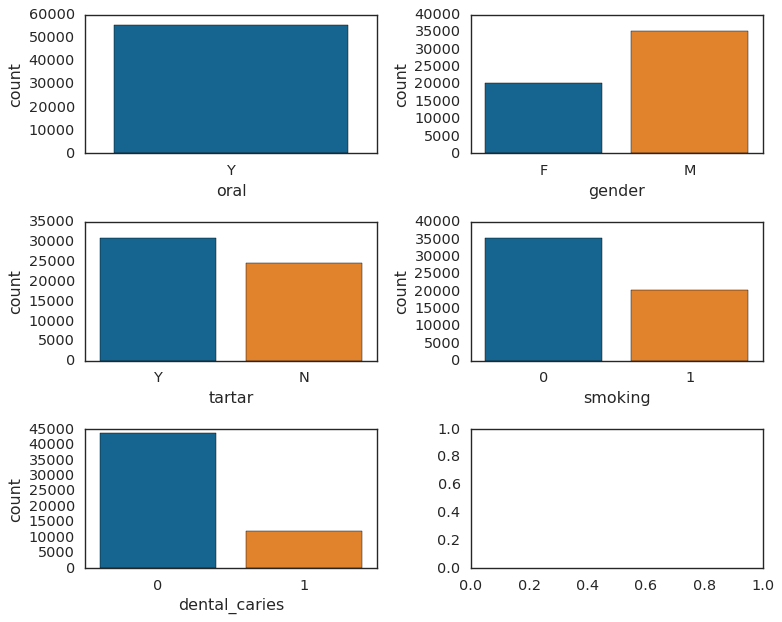

In [406]:
fig, axes = plt.subplots(3, 2, figsize = (10, 8))
axes = axes.flatten()

sns.countplot(ax = axes[0], x = data['oral'], data = data)
sns.countplot(ax = axes[1],x = data['gender'], data = data)
sns.countplot(ax = axes[2],x = data['tartar'], data = data)
sns.countplot(ax = axes[3],x = data['smoking'], data = data)
sns.countplot(ax = axes[4],x = data['dental_caries'], data = data)

plt.tight_layout()
plt.show()

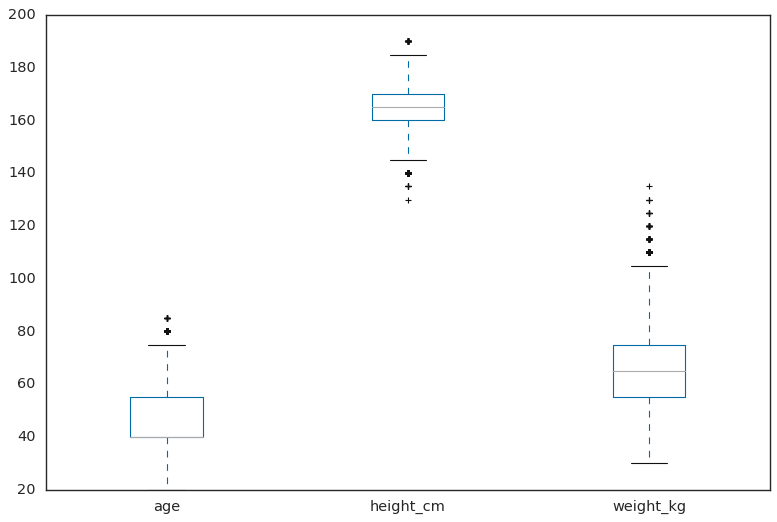

In [407]:
data.select_dtypes(include = 'int').drop(['ID', 'smoking', 'dental_caries'], axis = 1).plot.box()

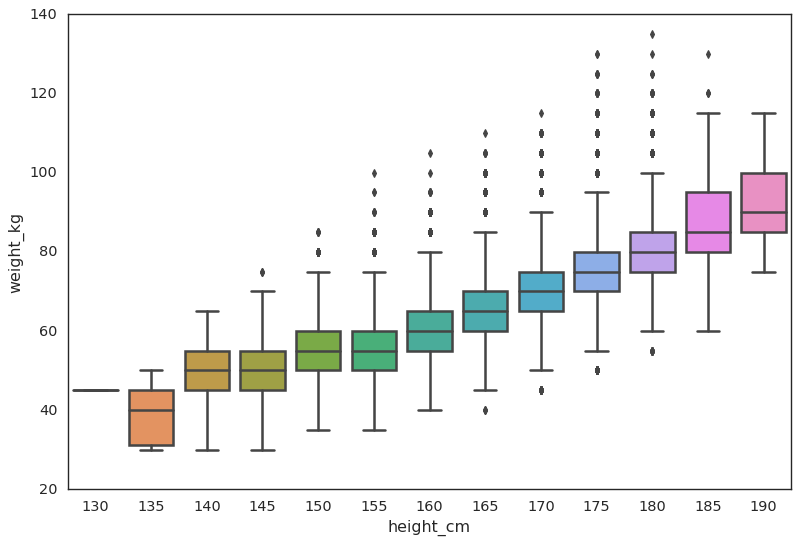

In [408]:
sns.boxplot(x = data['height_cm'], y = data['weight_kg'])

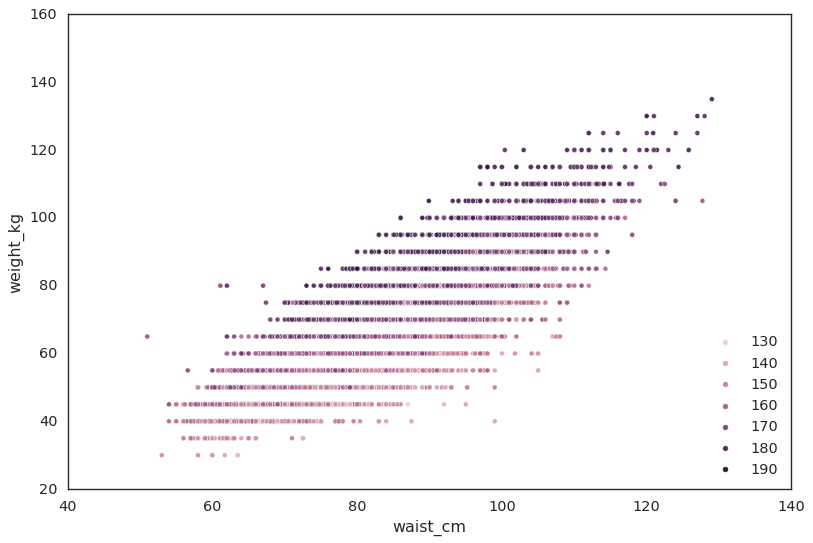

In [409]:
sns.scatterplot(x = data['waist_cm'], y = data['weight_kg'], hue = data['height_cm'])
plt.legend(loc = 4)

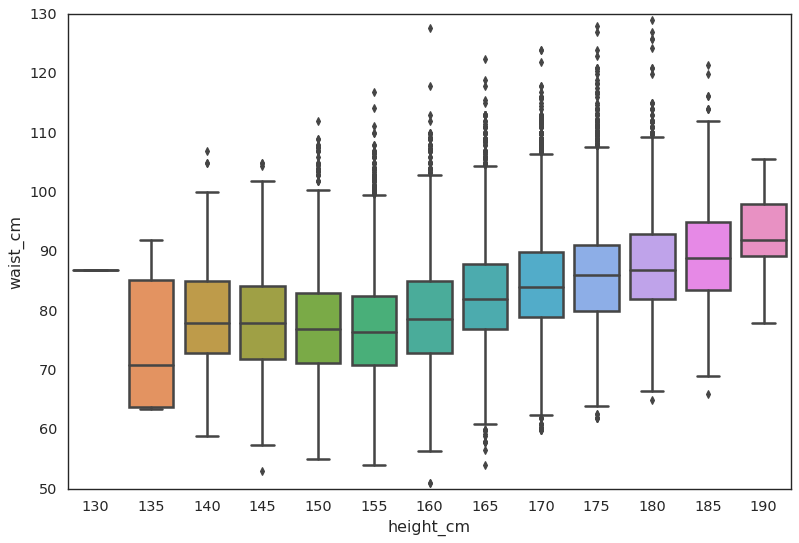

In [410]:
sns.boxplot(x = data['height_cm'], y = data['waist_cm'])

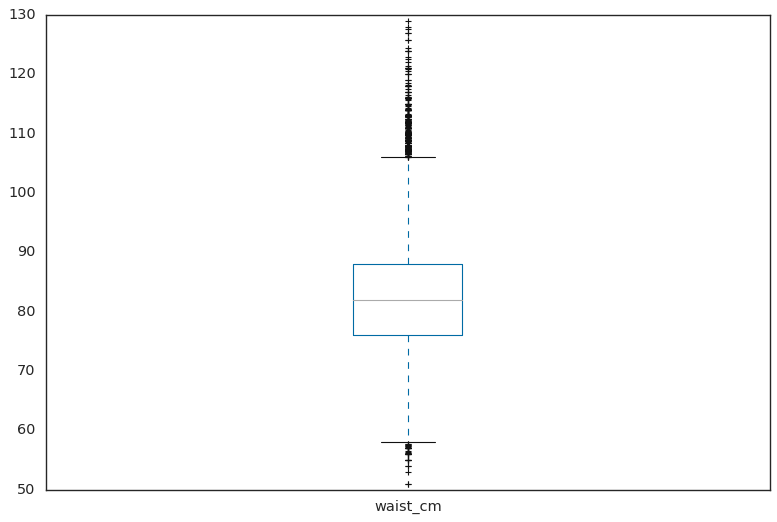

In [416]:
data.select_dtypes(include = 'float').iloc[:,0].plot.box()

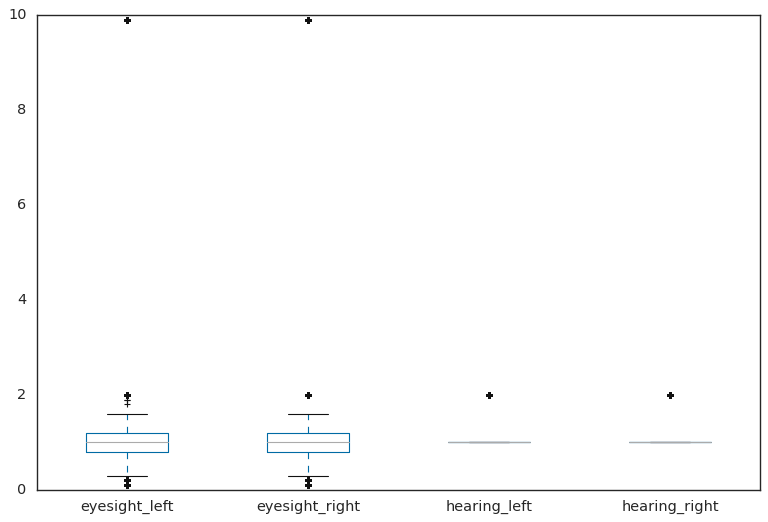

In [415]:
data.select_dtypes(include = 'float').iloc[:,1:5].plot.box()

In [414]:
data[(data['eyesight_left'] >= 5) & (data['eyesight_right'] >= 5)]

,ID,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,...,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
2603,3271,F,40,150,55,86.5,9.9,9.9,1.0,1.0,...,14.0,1.0,0.7,23.0,22.0,15.0,Y,1,Y,0
4148,5211,M,50,160,50,70.0,9.9,9.9,1.0,1.0,...,13.4,1.0,0.8,20.0,16.0,31.0,Y,1,Y,0
15424,19239,M,65,165,55,88.6,9.9,9.9,1.0,1.0,...,12.3,3.0,1.5,21.0,9.0,48.0,Y,0,Y,1
25340,31665,M,60,180,70,82.4,9.9,9.9,1.0,1.0,...,15.7,1.0,0.9,21.0,30.0,42.0,Y,0,N,0
31257,39051,M,55,165,55,79.0,9.9,9.9,1.0,1.0,...,15.9,1.0,1.1,29.0,37.0,71.0,Y,0,N,1
35196,43993,M,70,155,60,84.0,9.9,9.9,1.0,1.0,...,14.4,1.0,1.0,21.0,23.0,30.0,Y,0,N,1
35718,44630,M,55,165,75,93.6,9.9,9.9,1.0,1.0,...,14.7,1.0,1.1,26.0,24.0,20.0,Y,0,N,0
37119,46383,M,60,155,45,73.0,9.9,9.9,1.0,1.0,...,15.4,1.0,0.9,27.0,31.0,19.0,Y,0,Y,0
39234,49025,F,65,145,60,88.0,9.9,9.9,2.0,2.0,...,12.9,1.0,0.6,22.0,18.0,23.0,Y,0,N,0
40464,50561,M,45,170,75,88.0,9.9,9.9,1.0,1.0,...,14.9,1.0,1.1,30.0,35.0,59.0,Y,1,N,0


In [413]:
data[(data['eyesight_left'] >= 5) & ~(data['eyesight_right'] >= 5)]

,ID,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,...,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
333,424,F,55,150,60,85.0,9.9,1.0,1.0,1.0,...,13.1,2.0,1.0,39.0,30.0,38.0,Y,0,Y,0
1553,1952,M,60,165,75,93.8,9.9,0.5,1.0,1.0,...,11.7,4.0,10.3,18.0,13.0,34.0,Y,0,N,1
3359,4219,M,60,165,80,97.0,9.9,0.1,1.0,1.0,...,15.7,2.0,1.1,23.0,14.0,29.0,Y,0,Y,0
5106,6442,M,40,170,70,85.0,9.9,1.0,1.0,1.0,...,16.1,1.0,1.1,25.0,40.0,26.0,Y,0,N,0
7021,8833,F,80,145,55,97.5,9.9,0.6,1.0,1.0,...,13.5,1.0,0.8,21.0,11.0,17.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52193,38273,M,75,160,65,95.3,9.9,0.7,2.0,1.0,...,13.1,1.0,0.9,20.0,12.0,93.0,Y,0,N,1
52289,38778,M,60,165,45,76.0,9.9,1.5,2.0,2.0,...,14.4,1.0,0.7,26.0,17.0,20.0,Y,0,N,1
52557,40154,M,50,170,65,84.0,9.9,1.5,1.0,1.0,...,15.1,1.0,1.0,19.0,15.0,44.0,Y,0,Y,1
52877,41740,M,20,180,95,83.0,9.9,0.6,1.0,1.0,...,14.2,1.0,1.0,24.0,33.0,35.0,Y,0,Y,0


In [412]:
data[~(data['eyesight_left'] >= 5) & (data['eyesight_right'] >= 5)]

,ID,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,...,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
301,382,M,45,170,75,89.0,1.0,9.9,1.0,1.0,...,16.1,1.0,1.1,21.0,24.0,21.0,Y,0,Y,0
1338,1679,M,35,180,95,99.0,1.5,9.9,1.0,1.0,...,16.4,1.0,1.1,45.0,53.0,45.0,Y,0,Y,0
1623,2036,F,40,165,55,72.8,1.2,9.9,1.0,1.0,...,12.2,1.0,0.7,20.0,16.0,17.0,Y,0,Y,0
3204,4031,M,70,150,45,68.0,0.7,9.9,1.0,2.0,...,15.4,1.0,0.8,37.0,29.0,131.0,Y,0,N,1
3608,4537,F,45,155,60,76.0,1.0,9.9,1.0,1.0,...,13.2,1.0,0.7,20.0,13.0,16.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52648,40649,M,55,165,75,86.0,1.0,9.9,1.0,1.0,...,14.4,1.0,1.0,30.0,54.0,39.0,Y,0,N,0
53051,42594,M,40,165,75,88.5,0.5,9.9,1.0,1.0,...,15.4,1.0,0.9,21.0,23.0,24.0,Y,0,N,1
53845,46557,F,55,150,45,69.0,1.0,9.9,1.0,1.0,...,12.5,1.0,0.6,33.0,29.0,14.0,Y,1,Y,0
54842,51401,M,65,165,50,72.0,0.6,9.9,1.0,2.0,...,12.9,1.0,0.9,19.0,10.0,20.0,Y,0,N,1


In [450]:
print(data[data['eyesight_left'] >= 5].eyesight_left.value_counts())
print(data[data['eyesight_right'] >= 5].eyesight_right.value_counts())

#9.9는 실명이신 분들 의미 

9.9    92
Name: eyesight_left, dtype: int64
9.9    92
Name: eyesight_right, dtype: int64


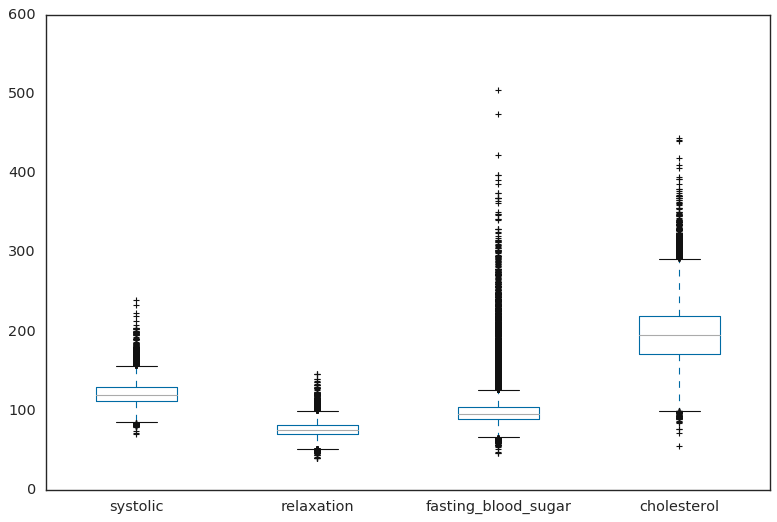

In [421]:
data.select_dtypes(include = 'float').iloc[:,5:9].plot.box()

In [453]:
data[data['triglyceride'] >= 500].triglyceride.value_counts()

548.0    1
999.0    1
Name: triglyceride, dtype: int64

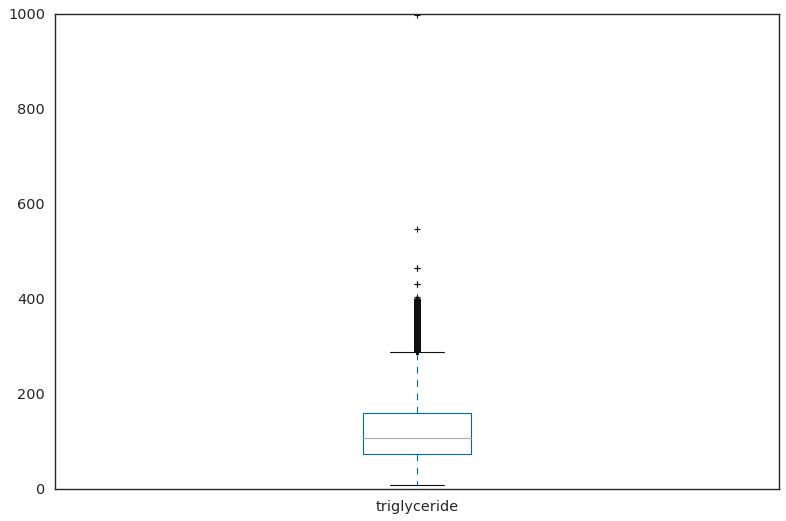

In [422]:
data.select_dtypes(include = 'float').iloc[:,9].plot.box()

In [458]:
data[data['ldl'] >= 1000].ldl.value_counts()

1070.0    2
1120.0    2
1200.0    2
1660.0    2
1010.0    2
1810.0    1
1260.0    1
1220.0    1
1860.0    1
1400.0    1
1560.0    1
1600.0    1
1340.0    1
Name: ldl, dtype: int64

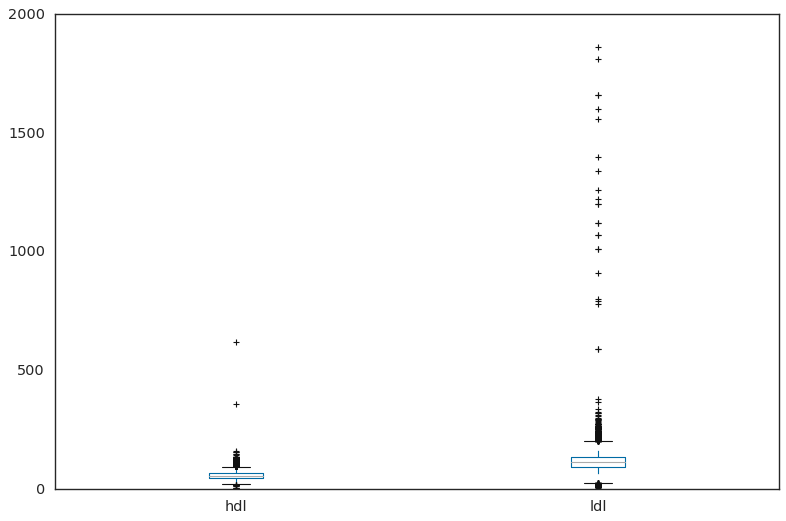

In [423]:
data.select_dtypes(include = 'float').iloc[:,10:12].plot.box()

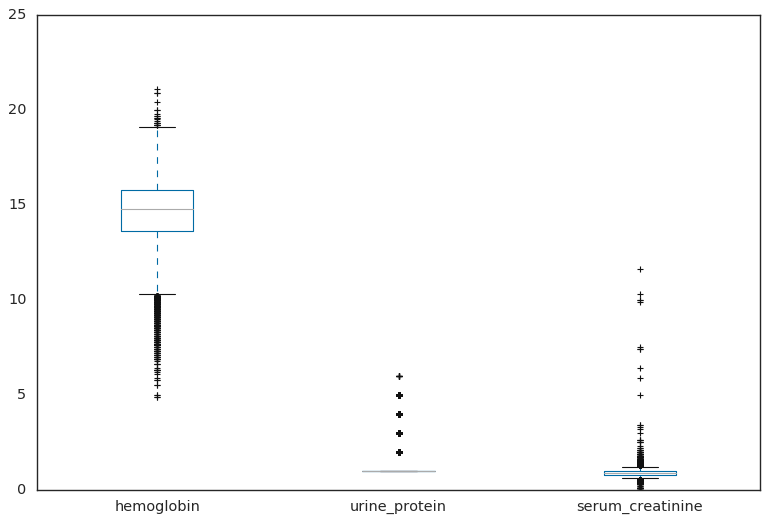

In [424]:
data.select_dtypes(include = 'float').iloc[:,12:15].plot.box()

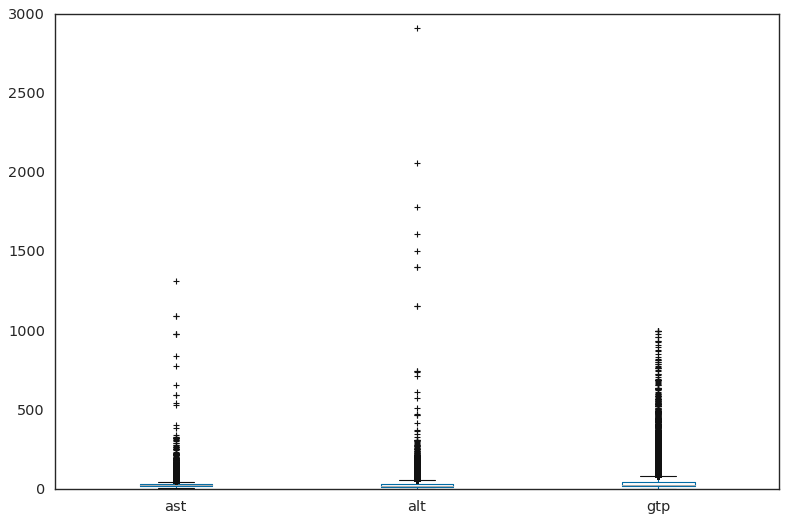

In [425]:
data.select_dtypes(include = 'float').iloc[:,15:18].plot.box()

In [337]:
for col in train.select_dtypes(include = ['int, ''float']):


In [88]:
data.drop(['ID', 'oral'], axis = 1, inplace=True)
data

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,N,0


In [215]:
train.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

In [288]:
from collections import Counter

def outlier_detection(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection(data, 5, data.select_dtypes(["float", "int"]).columns)
len(will_drop_train)

616

In [89]:
train, test = train_test_split(data, test_size=0.2, random_state=123)

In [91]:
x_train = train.drop('smoking', axis = 1)
y_train = train['smoking']
x_test = test.drop('smoking', axis = 1)
y_test = test['smoking']

In [93]:
dummy = pd.get_dummies(x_train[['gender', 'tartar']])
x_train = pd.concat([x_train.drop(['gender', 'tartar'], 
                                        axis = 1),
                           dummy], axis  = 1)


dummy = pd.get_dummies(x_test[['gender', 'tartar']])
x_test = pd.concat([x_test.drop(['gender', 'tartar'], 
                                      axis = 1),
                           dummy], axis  = 1)

In [94]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(44553, 26)
(44553,)
(11139, 26)
(11139,)


# Modeling

## Random Forest

In [289]:
rf = RandomForestClassifier(random_state=123, n_estimators=2600)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
score = rf.score(x_test, y_test)
rf_score_ = np.mean(score)
print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.836


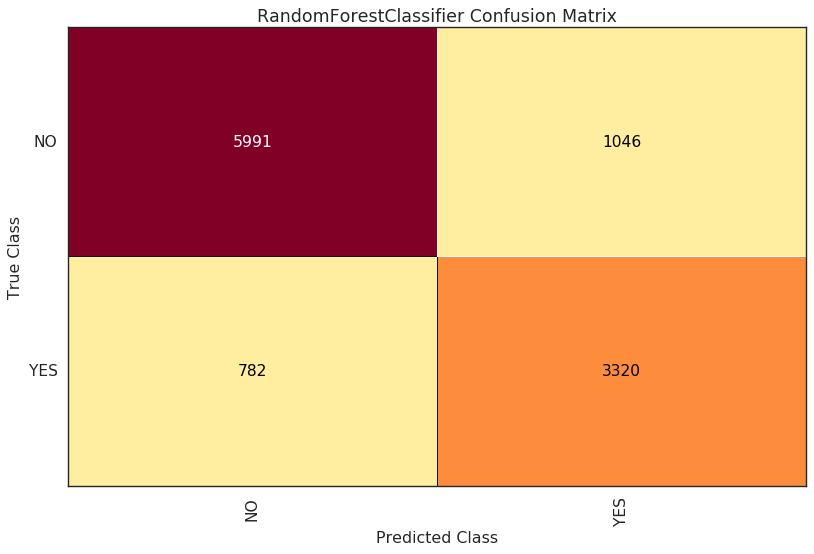

In [290]:
classes = ["NO","YES"]

rf_cm = ConfusionMatrix(rf, classes=classes, cmap='YlOrRd')
rf_cm.fit(x_train, y_train)
rf_cm.score(x_test, y_test)
rf_cm.show()

<Figure size 400x400 with 0 Axes>

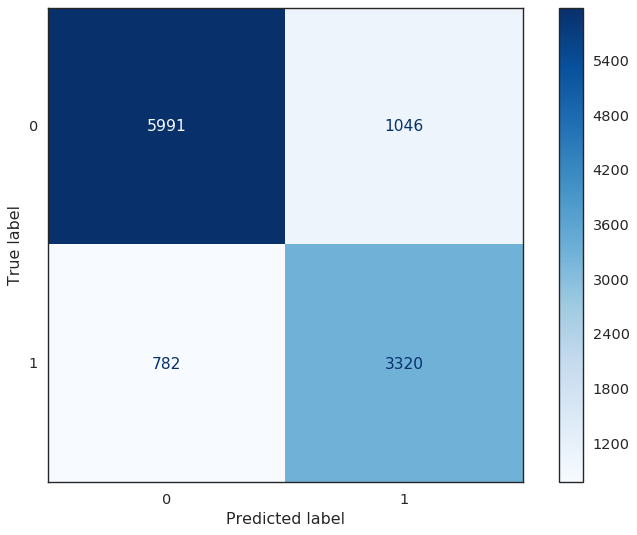

In [331]:
plt.figure(figsize=(5,5))
plot_confusion_matrix(rf, x_test, y_test, cmap = plt.cm.Blues)

In [291]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      7037
           1       0.76      0.81      0.78      4102

    accuracy                           0.84     11139
   macro avg       0.82      0.83      0.83     11139
weighted avg       0.84      0.84      0.84     11139



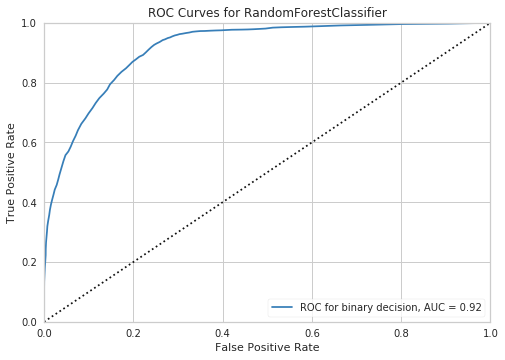

In [98]:
visualizer = ROCAUC(rf, binary= True)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()   

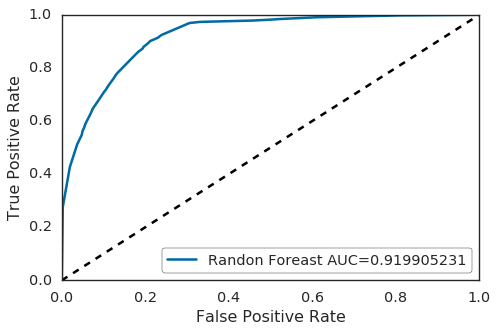

In [473]:
y_pred_prob = rf.predict_proba(x_test)[::,1]
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
rf_auc = metrics.roc_auc_score(y_test, y_pred_prob).round(10)

plt.figure(figsize=(6,4))
plt.style.use('seaborn-white')
plt.plot(rf_fpr,rf_tpr,label="Randon Foreast AUC="+str(rf_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4, frameon = True)
plt.show()

## GBM

In [102]:
gbm = GradientBoostingClassifier(random_state=123)
gbm.fit(x_train,y_train)
y_pred = gbm.predict(x_test)
score = gbm.score(x_test, y_test)
gbm_score_ = np.mean(score)
print('Accuracy : %.3f' % (gbm_score_))

Accuracy : 0.759


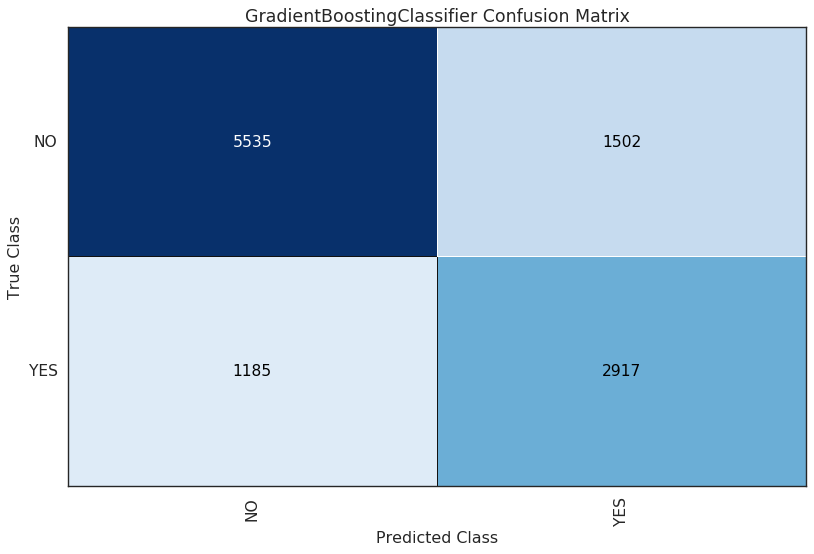

In [463]:
gbm_cm = ConfusionMatrix(gbm, classes=classes, cmap='Blues')
gbm_cm.fit(x_train, y_train)
gbm_cm.score(x_test, y_test)
gbm_cm.show()

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      7037
           1       0.66      0.71      0.68      4102

    accuracy                           0.76     11139
   macro avg       0.74      0.75      0.74     11139
weighted avg       0.76      0.76      0.76     11139



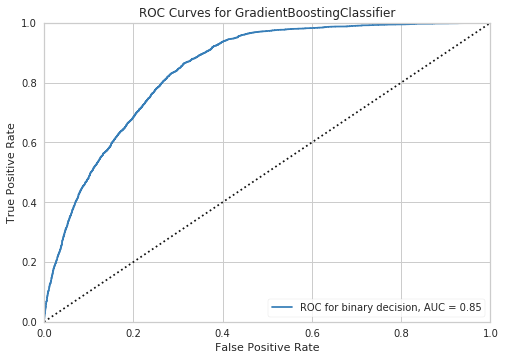

In [105]:
visualizer = ROCAUC(gbm, binary = True)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)     
visualizer.show()   

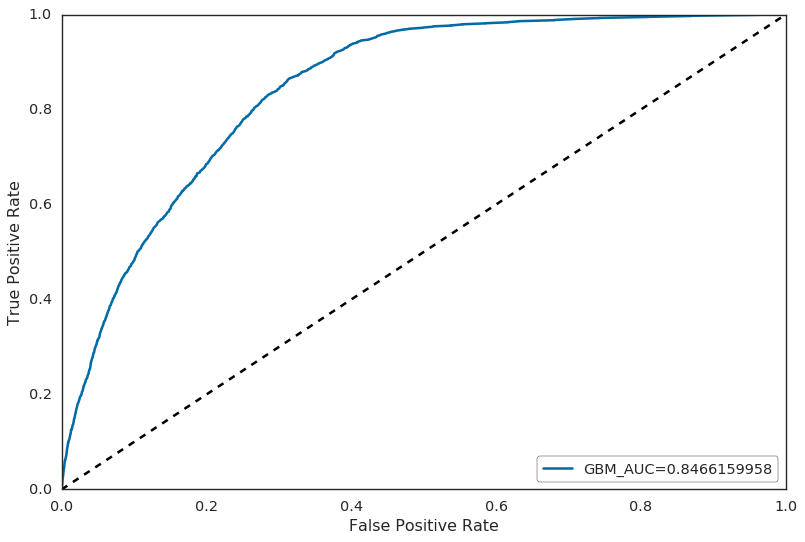

In [474]:
y_pred_prob = gbm.predict_proba(x_test)[::,1]
gbm_fpr, gbm_tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
gbm_auc = metrics.roc_auc_score(y_test, y_pred_prob).round(10)

plt.plot(gbm_fpr,gbm_tpr,label="GBM_AUC="+str(gbm_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4, frameon = True)
plt.show()

hyperparameter tuning

In [136]:
param_test = {
        "n_estimators": range(50, 100, 25),
        "max_depth": [1, 2, 4],
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "subsample": [0.7, 0.9],
        "max_features": list(range(1, len(x_train.columns), 2)),
    }



gsearch = GridSearchCV(estimator=gbm, param_grid=param_test, 
                       scoring="roc_auc", n_jobs=-1,
                       cv=5, verbose=1
                        )

gsearch.fit(x_train, y_train)

print("Best CV Score", gsearch.best_score_)
print("Best Params", gsearch.best_params_)

Fitting 5 folds for each of 624 candidates, totalling 3120 fits
Best CV Score 0.8503574331557813
Best Params {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 19, 'n_estimators': 75, 'subsample': 0.7}


In [137]:
gbm2 = GradientBoostingClassifier(**gsearch.best_params_)
gbm2.fit(x_train,y_train)
y_pred = gbm2.predict(x_test)
score = gbm2.score(x_test, y_test)
gbm2_score_ = np.mean(score)
print('Accuracy : %.3f' % (gbm2_score_))

Accuracy : 0.761


In [141]:
scores = cross_val_score(gbm2, x_train, y_train, cv=5) 
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score.mean 
0.767


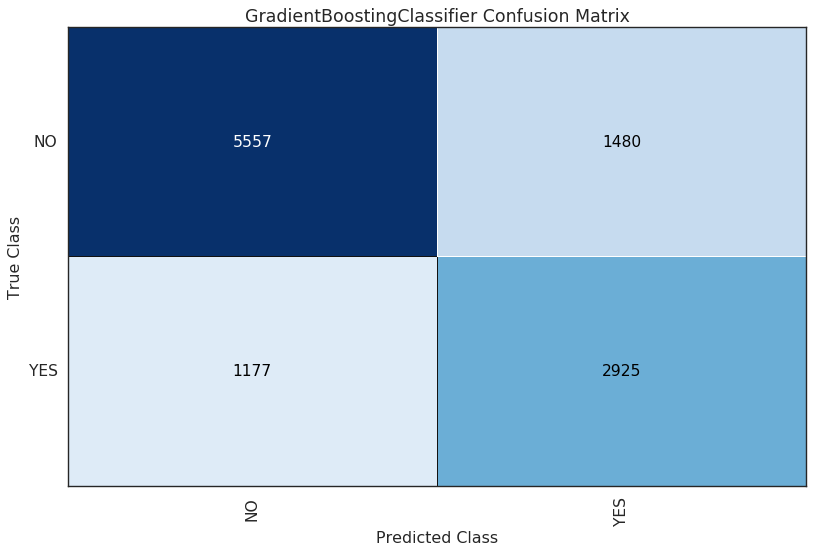

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      7037
           1       0.76      0.81      0.78      4102

    accuracy                           0.84     11139
   macro avg       0.82      0.83      0.83     11139
weighted avg       0.84      0.84      0.84     11139



In [464]:
gbm_cm = ConfusionMatrix(gbm2, classes=classes, cmap='Blues')
gbm_cm.fit(x_train, y_train)
gbm_cm.score(x_test, y_test)
gbm_cm.show()

print(classification_report(y_test, y_pred))

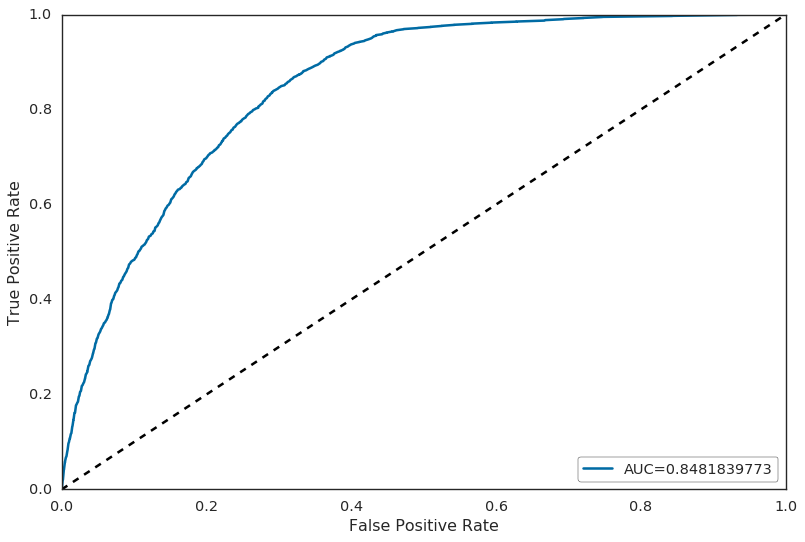

In [475]:
y_pred_prob = gbm2.predict_proba(x_test)[::,1]
gbm2_fpr, gbm2_tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
gbm2_auc = metrics.roc_auc_score(y_test, y_pred_prob).round(10)

plt.plot(gbm2_fpr,gbm2_tpr,label="AUC="+str(gbm2_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4, frameon = True)
plt.show()

## LightGBM

In [107]:
lgbm = LGBMClassifier(random_state=123)
lgbm.fit(x_train,y_train)
y_pred = lgbm.predict(x_test)
score = lgbm.score(x_test, y_test)
lgbm_score_ = np.mean(score)
print('Accuracy : %.3f' % (lgbm_score_))

Accuracy : 0.771


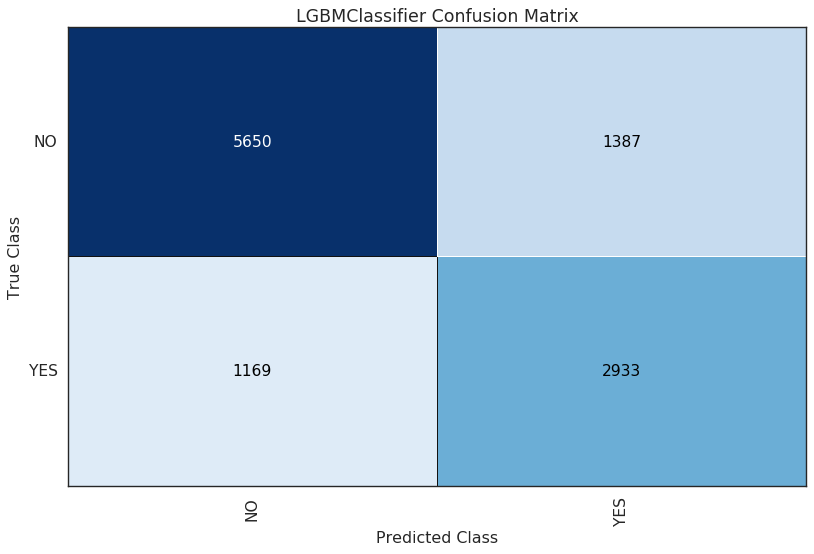

In [465]:
lgbm_cm = ConfusionMatrix(lgbm, classes=classes, cmap='Blues')
lgbm_cm.fit(x_train, y_train)
lgbm_cm.score(x_test, y_test)
lgbm_cm.show()

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      7037
           1       0.68      0.72      0.70      4102

    accuracy                           0.77     11139
   macro avg       0.75      0.76      0.76     11139
weighted avg       0.77      0.77      0.77     11139



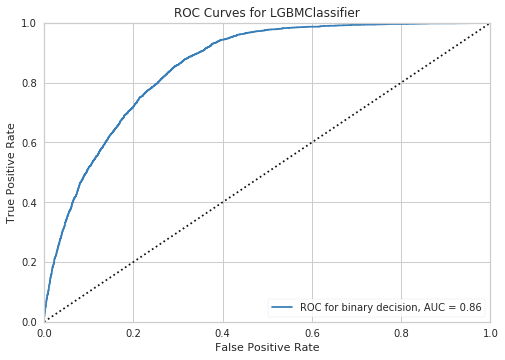

In [110]:
visualizer = ROCAUC(lgbm, binary = True)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()   

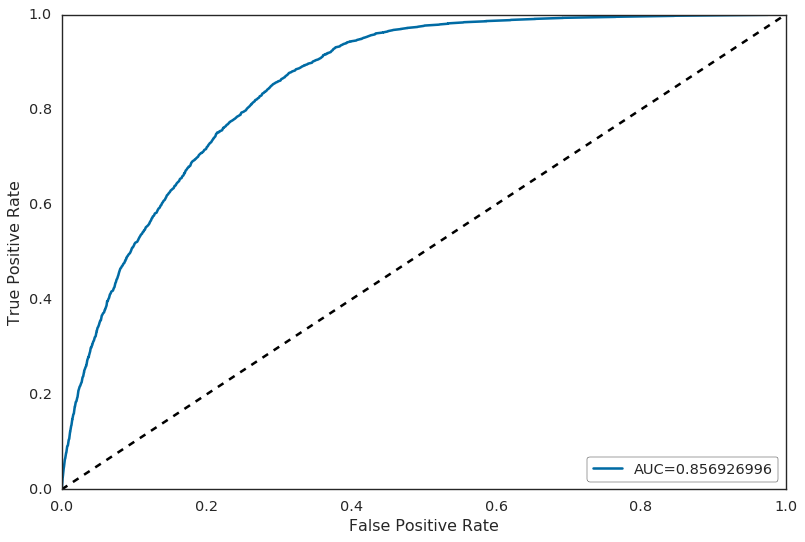

In [476]:
y_pred_prob = lgbm.predict_proba(x_test)[::,1]
lgbm_fpr, lgbm_tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
lgbm_auc = metrics.roc_auc_score(y_test, y_pred_prob).round(10)

plt.plot(lgbm_fpr,lgbm_tpr,label="AUC="+str(lgbm_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4, frameon = True)
plt.show()

hyperparameter tuning

In [167]:
np.array(sp_randint(6, 50))

array(<scipy.stats._distn_infrastructure.rv_frozen object at 0x7fee46045a50>,
      dtype=object)

In [179]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}


gsearch = RandomizedSearchCV(estimator=lgbm, param_distributions=param_test, 
                       scoring="roc_auc", n_jobs=-1,
                       n_iter=100, refit=True,      
                       cv=5, verbose=True
                        )

In [181]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(x_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

gsearch.fit(x_train, y_train, **fit_params)

print('Best score reached: {} with params: {} '.format(gsearch.best_score_, gsearch.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[100]	valid's auc: 0.858019	valid's binary_logloss: 0.441034
Best score reached: 0.8587041499980934 with params: {'colsample_bytree': 0.6826641886676563, 'min_child_samples': 226, 'min_child_weight': 0.001, 'num_leaves': 49, 'reg_alpha': 5, 'reg_lambda': 1, 'subsample': 0.40261466241743576} 


In [182]:
opt_parameters = {'colsample_bytree': 0.6826641886676563, 'min_child_samples': 226, 'min_child_weight': 0.001, 
                  'num_leaves': 49, 'reg_alpha': 5, 'reg_lambda': 1, 'subsample': 0.40261466241743576}

In [188]:
lgbm2 = LGBMClassifier(**lgbm.get_params())
lgbm2.set_params(**opt_parameters)

LGBMClassifier(colsample_bytree=0.6826641886676563, min_child_samples=226,
               num_leaves=49, random_state=123, reg_alpha=5, reg_lambda=1,
               subsample=0.40261466241743576)

In [189]:
lgbm2.fit(x_train,y_train)
y_pred = lgbm2.predict(x_test)
score = lgbm2.score(x_test, y_test)
lgbm2_score_ = np.mean(score)
print('Accuracy : %.3f' % (lgbm2_score_))

Accuracy : 0.774


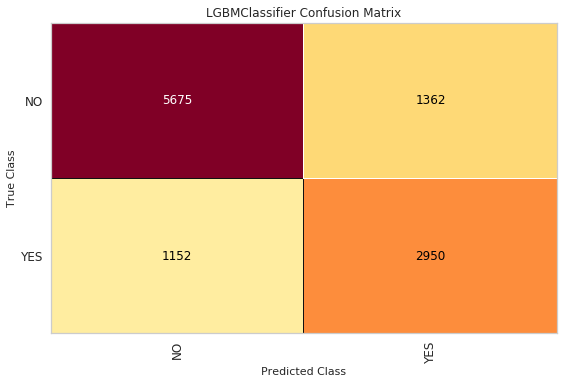

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7037
           1       0.68      0.72      0.70      4102

    accuracy                           0.77     11139
   macro avg       0.76      0.76      0.76     11139
weighted avg       0.78      0.77      0.78     11139



In [190]:
lgbm2_cm = ConfusionMatrix(lgbm2, classes=classes, cmap='YlOrRd')
lgbm2_cm.fit(x_train, y_train)
lgbm2_cm.score(x_test, y_test)
lgbm2_cm.show()
print(classification_report(y_test, y_pred))

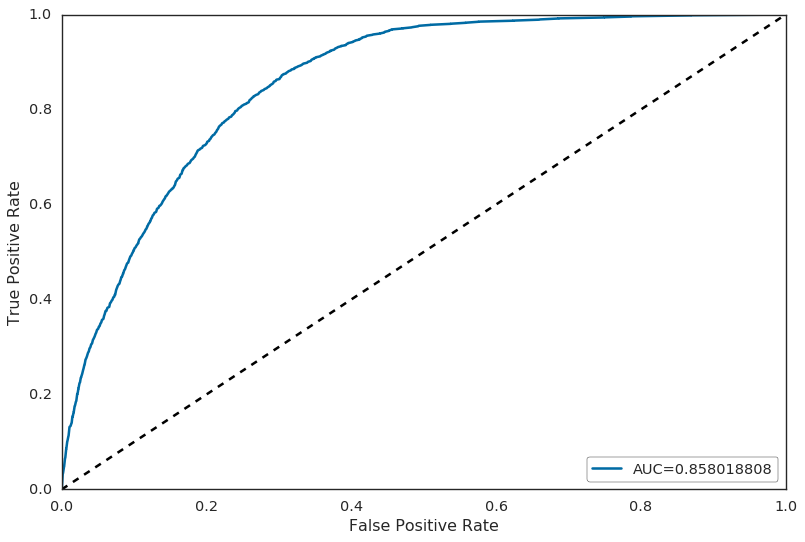

In [477]:
y_pred_prob = lgbm2.predict_proba(x_test)[::,1]
lgbm2_fpr, lgbm2_tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
lgbm2_auc = metrics.roc_auc_score(y_test, y_pred_prob).round(10)

plt.plot(lgbm2_fpr,lgbm2_tpr,label="AUC="+str(lgbm2_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4, frameon = True)
plt.show()

## xgboost

In [117]:
xgb = XGBClassifier(random_state=123)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
score = xgb.score(x_test, y_test)
xgb_score_ = np.mean(score)
print('Accuracy : %.3f' % (xgb_score_))

Accuracy : 0.781


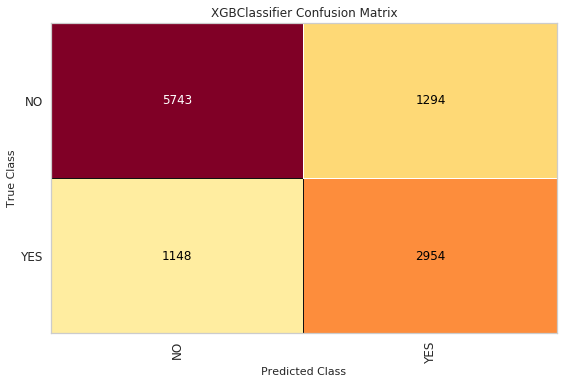

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7037
           1       0.70      0.72      0.71      4102

    accuracy                           0.78     11139
   macro avg       0.76      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139



In [122]:
xgb_cm = ConfusionMatrix(xgb, classes=classes, cmap='YlOrRd')
xgb_cm.fit(x_train, y_train)
xgb_cm.score(x_test, y_test)
xgb_cm.show()
print(classification_report(y_test, y_pred))

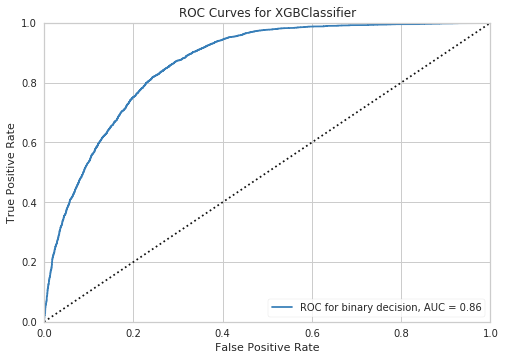

In [123]:
visualizer = ROCAUC(xgb, binary = True)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()   

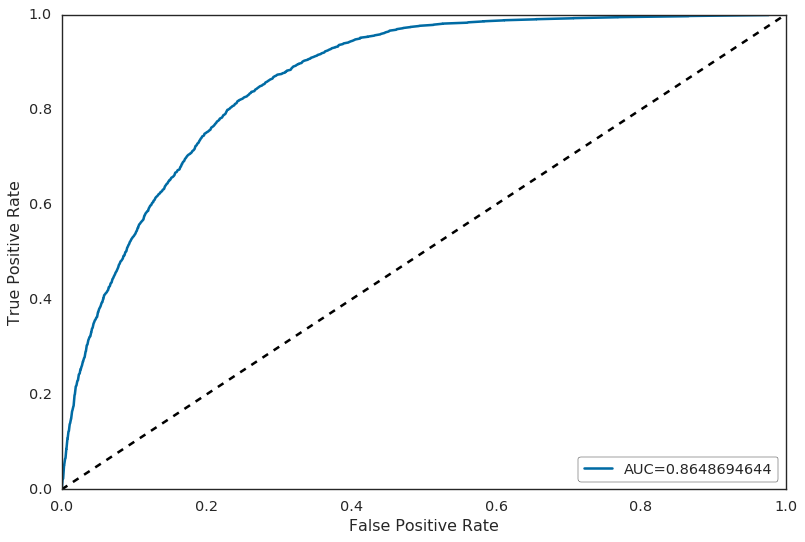

In [478]:
y_pred_prob = xgb.predict_proba(x_test)[::,1]
xgb_fpr, xgb_tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
xgb_auc = metrics.roc_auc_score(y_test, y_pred_prob).round(10)

plt.plot(xgb_fpr,xgb_tpr,label="AUC="+str(xgb_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4, frameon = True)
plt.show()

summary

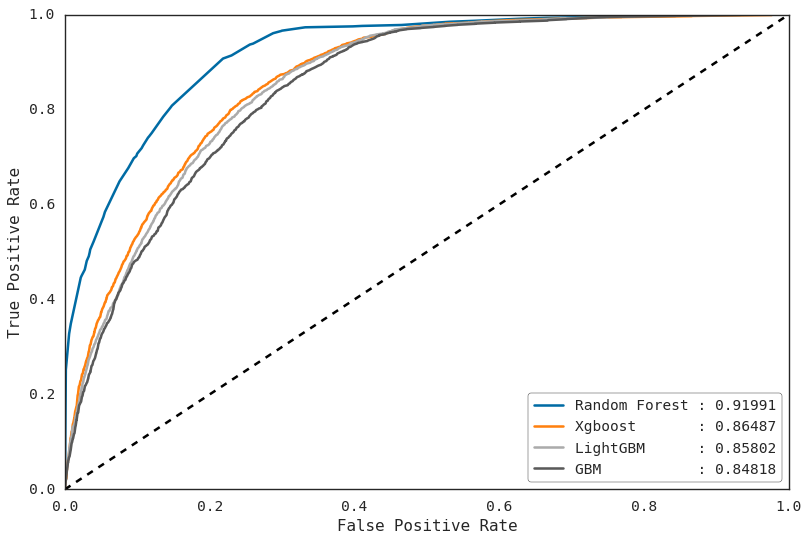

In [509]:
plt.rcParams['font.family'] = 'monospace'

plt.plot(rf_fpr,rf_tpr,label="Random Forest : "+str(rf_auc.round(5)))
plt.plot(xgb_fpr,xgb_tpr,label="Xgboost       : "+str(xgb_auc.round(5)))
plt.plot(lgbm2_fpr,lgbm2_tpr,label="LightGBM      : "+str(lgbm2_auc.round(5)))
plt.plot(gbm2_fpr,gbm2_tpr,label="GBM           : "+str(gbm2_auc.round(5)))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4, frameon = True, prop={'family': 'monospace'})

plt.show()